# 京都という斜面、流れる水路の流れを眺めてみよう('24.05.22)


## マンハッタン座標系で作られた京都という街

京都の地名は、道を基準に、北が上ルで南が下ル。
東や西は入ル。
基本的に、マンハッタン座標系と東西南北の方向で指示されます。
だから、京都の街での距離は、ほとんどユークルド・ノルムで表されることになります。

## 北は標高が高くて南は標高が低い、山に囲まれた京都盆地

けれど、「北が上ルで南が下ル」という言葉の通り、北は標高が高くて南は標高が低い、それが山に囲まれた京都盆地です。
そのため、自転車で標高が高い北に上ルときは位置エネルギーの分、ペダルを踏む足に力を入れる必要があります。
その逆に、帰宅に下ル時は、自然に自転車が加速していくものです。

だから、京都の街を歩いたり・自転車で巡る時には、標高という名のスカラー値、つまりは位置エネルギーをいやでも意識することになります。

## 地理院地図データで京都の坂道を可視化する

[Software Design誌2024年6月号](https://amzn.to/4atSWTx)や[Software Design誌2023年5月号](https://amzn.to/3VbSc0M)に、国土地理院が地理院地図(電子国土Web)で提供している標高データや地図・航空写真を使ったデータ処理記事を書きました。
それと同様の方法で、今回は[京都の地理院地図データ](https://maps.gsi.go.jp/#15/35.015201/135.744817/&base=ort&ls=ort%7Ctoho1&blend=0&disp=11&lcd=toho1&vs=c1g1j0h0k0l0u0t0z0r0s0m0f1&d=m)をッ使って、京都の坂道を可視化してみます。

まずは、[Software Design誌2024年6月号](https://amzn.to/4atSWTx)や[Software Design誌2023年5月号](https://amzn.to/3VbSc0M)と同様に、国土地理院の地理院情報をもとに3Dレンダリングするための関数を定義しておきます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio.v3 import imread, imwrite # conda install conda-forge::imageio
import cv2; from mpl_toolkits.mplot3d import Axes3D

# 国土地理院の地理院情報をもとに3Dレンダリングする
def draw_jp_map(texture, dem, height):
    l=512
    size=(l,l)
    # 標高データをlxlピクセルに解像度変換する
    z = cv2.resize(dem, size)
    # 地図画像データも同様にlxlピクセルに解像度変換する
    tex = cv2.resize(np.delete(texture, 3, axis=2), size)
    # 描画する高さ・色データを作成する
    x = y = np.linspace(0, l, l)
    x, y = np.meshgrid(x, y)
    x = np.ravel(x);y = np.ravel(y);z = np.ravel(z)
    c=np.reshape(tex,(l*l,3))
    for idx, z_ in enumerate(z):
        if z_< height:
          z[idx]=0.0
          c[idx]=[0,0,1]
    fig=plt.figure(figsize=[20,20])
    ax=fig.add_subplot(111,projection='3d')
    # レンダリングする標高レンジを決める
    ax.set_zlim(20,120)
    # レンダリングする視点を決める
    # elevはz軸方向から見た仰角，azimはx, y軸方向の方位角．
    ax.view_init(elev=30, azim=240)
    ax.invert_yaxis()
    ax.scatter3D(x,y,z,
        s=8,alpha=0.6,
        c=np.reshape(tex,(l*l,3)))

## 京都の街は意外に坂道だ。

その上で、[京都の地理院地図データ](https://maps.gsi.go.jp/#15/35.015201/135.744817/&base=ort&ls=ort%7Ctoho1&blend=0&disp=11&lcd=toho1&vs=c1g1j0h0k0l0u0t0z0r0s0m0f1&d=m)を使って、標高差を強調しつつ、京都の街を3Dレンダリングしてみます。
手前左が嵐山・嵯峨野、左奥の斜面が化野念仏寺・仁和寺・竜安寺・金閣寺がある京都の西北。
そこを北から南に流れるのが桂川。

右奥が修学院離宮から銀閣寺がある京都の東北、そして、右手前が南禅寺・清水寺・三十三間堂がある京都の東側です。
北東奥から流れる賀茂川と高野川が交わる鴨川デルタから、鴨川という名前を襲名した水の流れは南へ流れ、やがて桂川と合流し、淀川という名前を次に襲名することになります。

そんな街並みを3Dレンダリングした結果が、次の結果です。

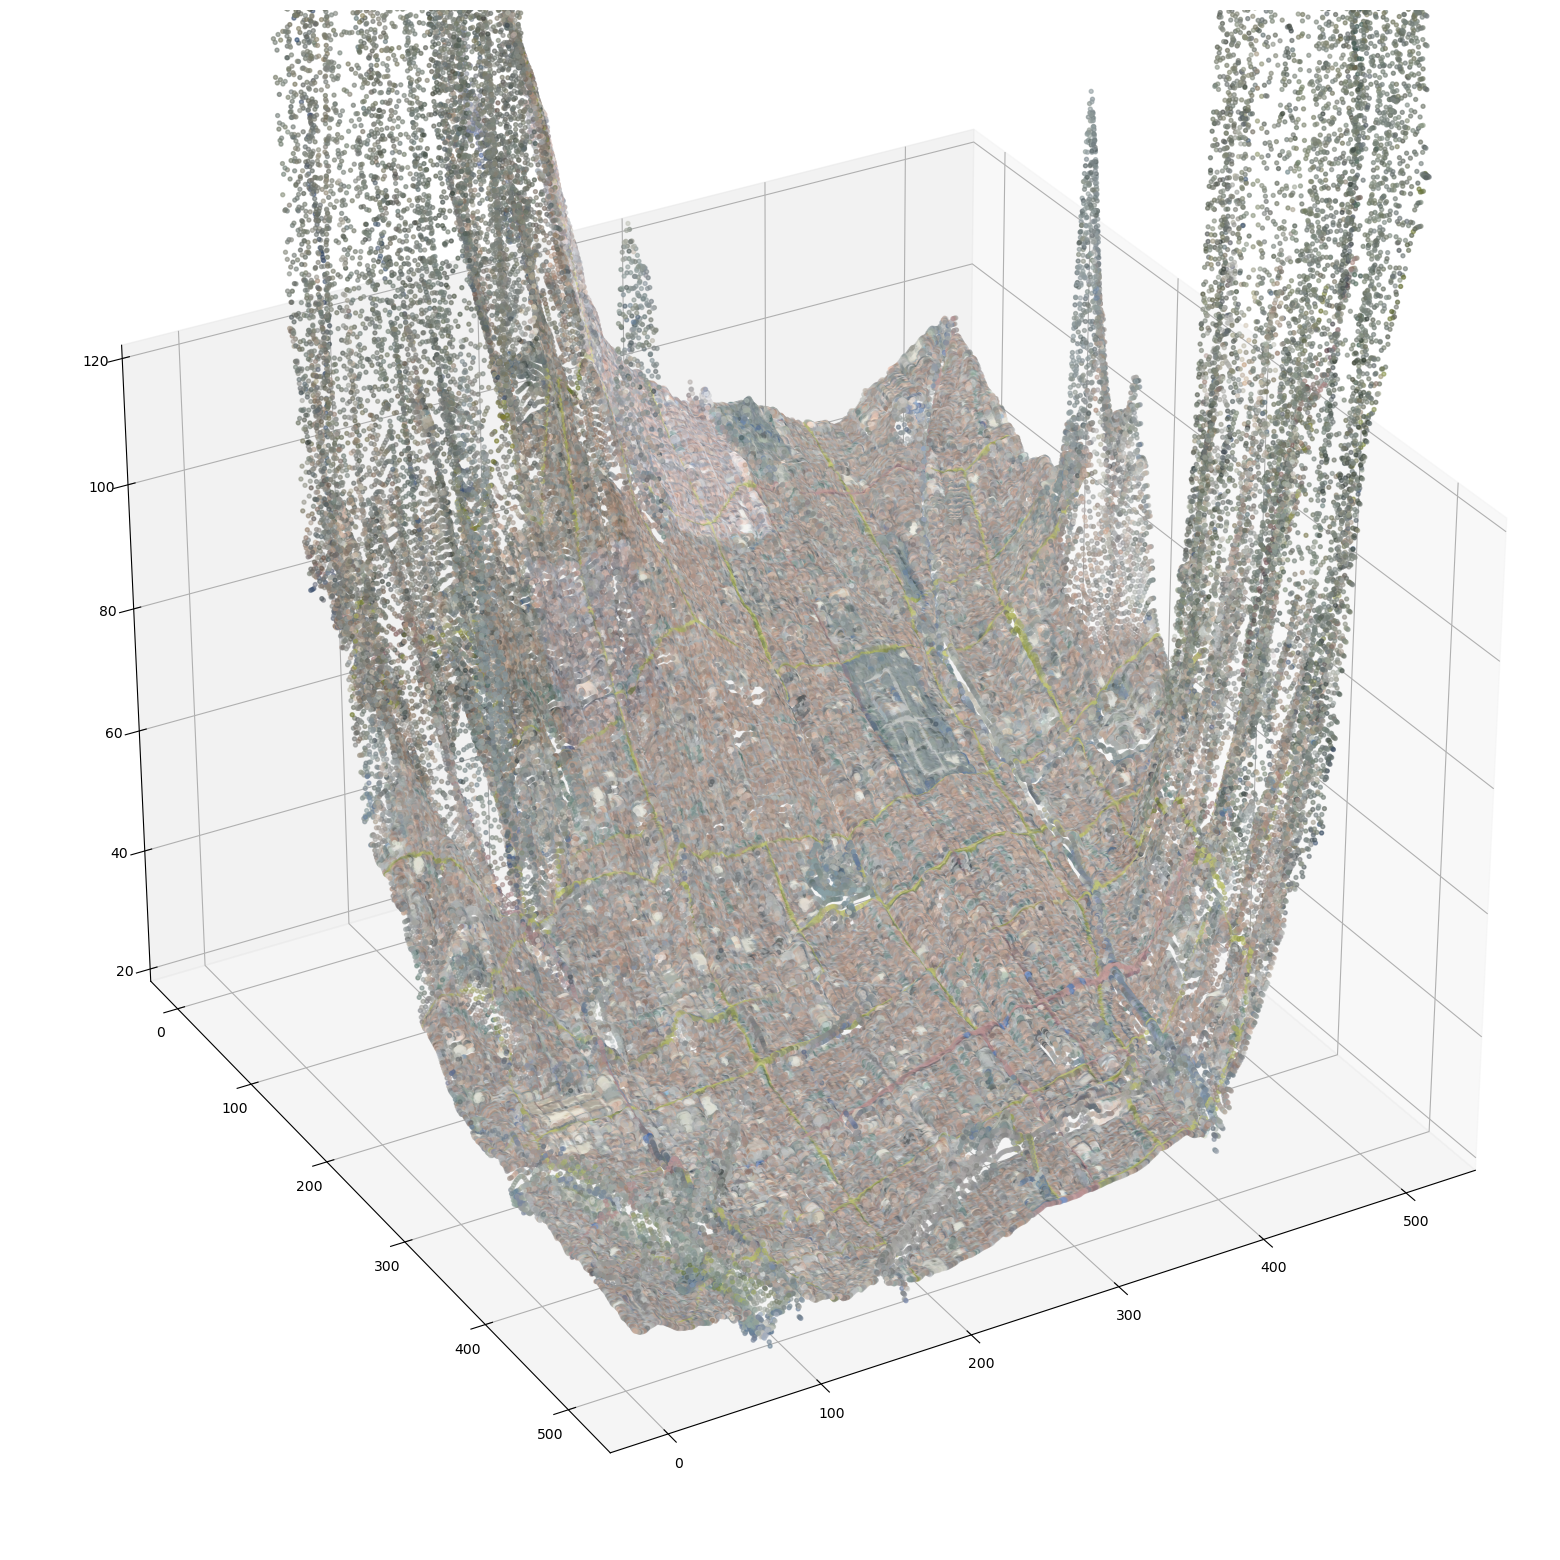

In [2]:
# 地図画像と写真画像(2048, 2048, 4)を読む
# 地図画像
texture_map = imread('day_240522_imageio_kyoto_texture.png')
# 写真画像
texture_photo = imread('day_240522_imageio_kyoto_texture-2.png')
# 地図・写真を適当な比率で合成する
texture = (texture_map*0.3+texture_photo*0.7)/255 
# 標高情報（CSVファイル）を読み込む
dem = np.loadtxt('day_240522_imageio_kyoto_dem.csv', delimiter=',')
dem_size = 257
dem = 100*dem.reshape([dem_size,dem_size])

draw_jp_map(texture, dem, 7)

## 東山なら六波羅蜜寺、西なら竜安寺近くは高い丘

「北から南への下り坂」が京都という街ですが、それに加えて、京都には意外なことに坂があります。
たとえば、京都の東なら六波羅蜜寺辺り、あるいは西なら竜安寺近く、その辺りは小高い場所になっています。

京都の街並みを散策する時は、こんな3D標高地図を頭に浮かべて歩いてみると、面白いかもしれません。